In [124]:
from scipy.stats import zscore
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from utilities import load_face_data
import matplotlib.pyplot as plt
import time
%matplotlib inline
start_time = time.time()

In [125]:
faces, labels = load_face_data('face.mat')
print(faces.shape)
train_face, test_face, train_labels, test_labels = train_test_split(faces, labels, test_size=0.3)
print(train_face.shape)

(520, 2576)
(364, 2576)


In [126]:
for label in test_labels:
    if label not in train_labels:
        print('Absent: {}'.format(label))
    

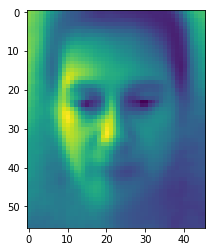

In [127]:
mean_face = np.mean(train_face, axis = 0)
centered_train_face = train_face - mean_face
plt.imshow(np.rot90(mean_face.reshape(46, -1), k = -1))

## TRAIN SET - (EVECS = FACES)

In [128]:
# S = 1 / centered_train_face.shape[1] * np.dot(centered_train_face.T, centered_train_face)
# # S = np.dot(centered_train_face.T, centered_train_face)
# evals, evecs = np.linalg.eigh(S)
# evecs = np.flip(evecs, axis = 1)
# evals = np.flip(evals, axis = 0)

# f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5))
# ax2.plot(np.arange(len(evals)), np.cumsum(evals) / np.sum(evals))
# ax2.set_title('Cummulative sum of normalized eigenvalues')
# ax2.set_xlabel('Number of eigenvalues taken')
# ax2.set_ylabel('Cummulative sum of normalized eigenvalues')
# ax1.plot(np.arange(len(evals)), evals)
# ax1.set_title('Magnitude of eigenvalues')
# ax1.set_xlabel('Eigenvalue index')
# ax1.set_ylabel('Magnitude of eigenvalues')

# num_evals = np.sum(np.cumsum(evals) / np.sum(evals) < 0.95)
# evecs_tmp = evecs
# evals_tmp = evals
# print('number of evals for 95% variance: {}'.format(num_evals))
# print('number of evals equal to zero: {}'.format(np.sum(evals<1e-5)))

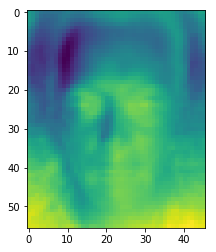

In [129]:
plt.imshow(np.rot90(evecs[:,0].reshape(46, -1), k = -1))
# plt.imshow(np.rot90(evecs[:,300].reshape(46, -1), k = -1))

In [130]:
# for face_chosen in [10, 23, 50]:
#     pics = []
# #     face_chosen = 50
#     plt.figure(figsize=(30,10))
#     for M in [1, 10, 100, 200, 300, 400]:
#         best_evecs = evecs[:,:M]
#         a_face_chosen = np.dot(centered_train_face[face_chosen], best_evecs)
#         reconstructed = mean_face + np.dot(a_face_chosen, best_evecs.T)
#         pics.append(np.rot90(reconstructed.reshape(46, -1), k = -1))

# #         print('error for {} evecs: {}'.format(M, np.mean((zscore(train_face[face_chosen]) - zscore(reconstructed)) ** 2)))


#     pics.append(np.rot90(train_face[face_chosen].reshape(46, -1), k = -1))

#     plt.imshow(np.hstack(pics))
#     plt.show()

## TEST SET - V (EVECS = FACES)

In [131]:
# centered_test_face = test_face - mean_face
# for face_chosen in [10, 23, 50]:
#     pics = []
# #     face_chosen = 50
#     plt.figure(figsize=(30,10))
#     for M in [1, 10, 100, 200, 300, 400]:
#         best_evecs = evecs[:,:M]
#         a_face_chosen = np.dot(centered_test_face[face_chosen], best_evecs)
#         reconstructed = mean_face + np.dot(a_face_chosen, best_evecs.T)
#         pics.append(np.rot90(reconstructed.reshape(46, -1), k = -1))

# #         print('error for {} evecs: {}'.format(M, np.mean((zscore(test_face[face_chosen]) - zscore(reconstructed)) ** 2)))


#     pics.append(np.rot90(test_face[face_chosen].reshape(46, -1), k = -1))

#     plt.imshow(np.hstack(pics))
#     plt.show()

## TRAIN - U (EVECS != FACES)

number of evals for 95% variance: 114
shape of eigenvector matrix: (2576, 364)


(364, 364)

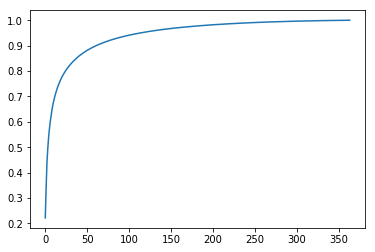

In [132]:
S =  1 / centered_train_face.shape[1] * np.dot(centered_train_face, centered_train_face.T)
# S =  np.dot(centered_train_face, centered_train_face.T)
evals, evecs = np.linalg.eigh(S)
evecs = np.dot(centered_train_face.T,np.flip(evecs, axis = 1))
evecs = normalize(evecs,axis=0)
evals = np.flip(evals,axis = 0)
plt.plot(np.arange(len(evals)), np.cumsum(evals) / np.sum(evals))
num_evals = np.sum(np.cumsum(evals) / np.sum(evals) < 0.95)
print('number of evals for 95% variance: {}'.format(num_evals))
print('shape of eigenvector matrix: {}'.format(evecs.shape))
S.shape

In [133]:
print("--- Preprocessing: %s seconds ---" % (time.time() - start_time))

--- Preprocessing: 0.8359801769256592 seconds ---


In [94]:
# Eigenvalue comparison
evals_error = (evals_tmp[:364] - evals).max()
print('Max eigenvalue difference: {}'.format(evals_error))

# Eigenvector comparison
evecs_error = (np.sign(evecs_tmp[:,:363])*(evecs_tmp[:,:363]) - (np.sign(evecs[:,:363]))*(evecs[:,:363])).mean(axis=1).max()
print('Max eigenvector mean difference: {}'.format(evecs_error))

Max eigenvalue difference: 124151.40887655536
Max eigenvector mean difference: 8.111730276019563e-15


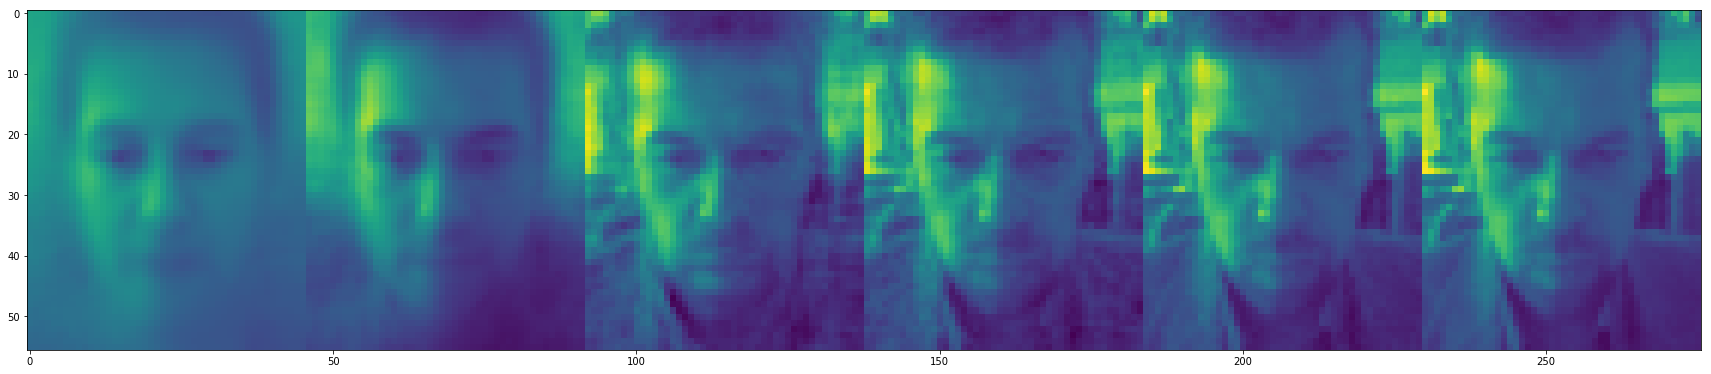

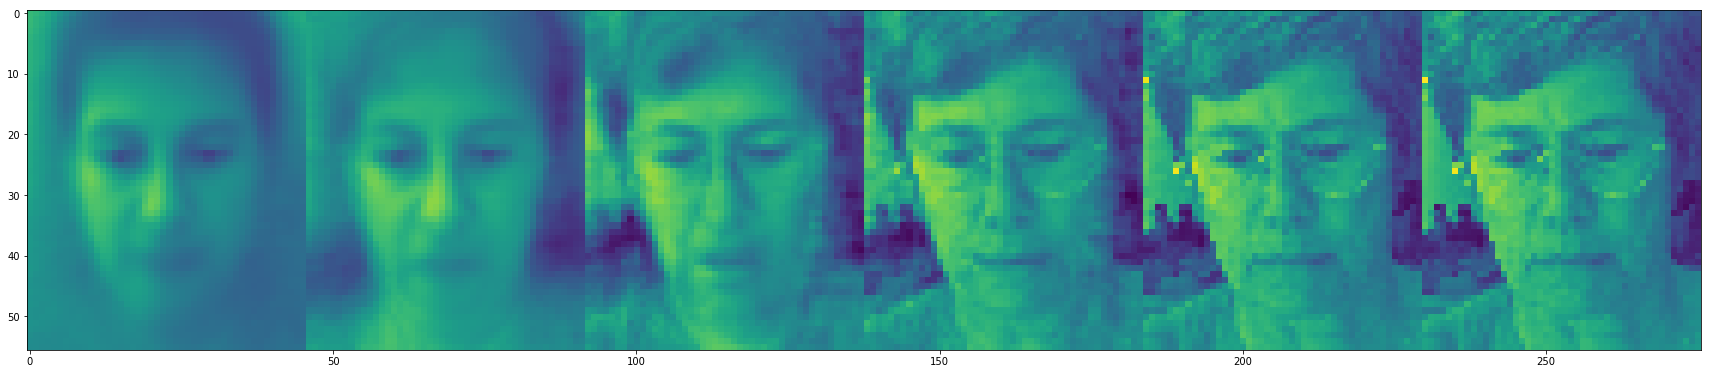

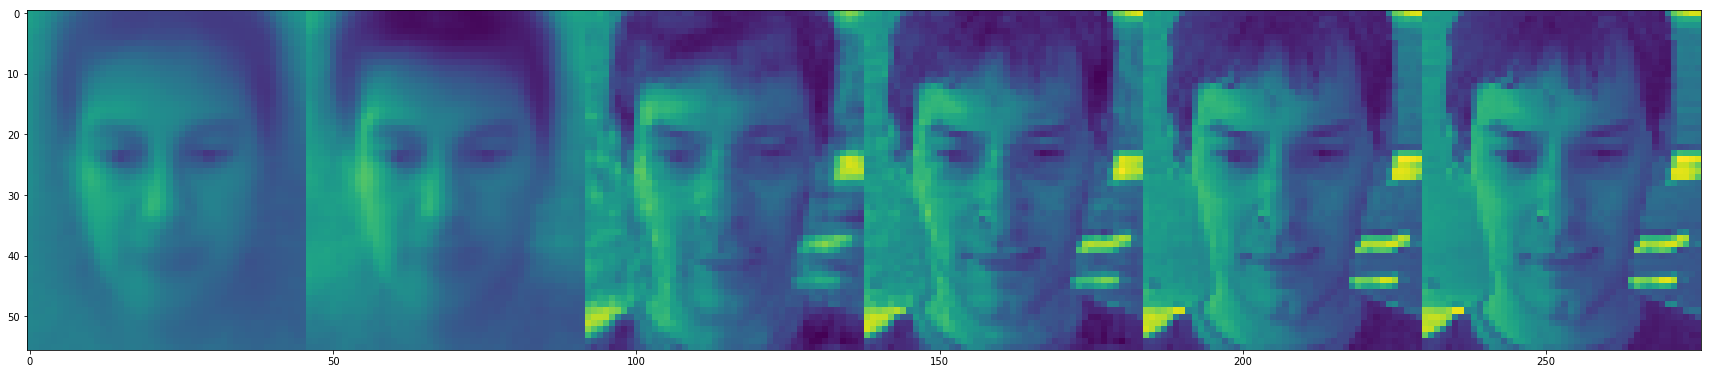

In [95]:
for face_chosen in [10, 23, 50]:
    pics = []
#     face_chosen = 50
    plt.figure(figsize=(30,10))
    for M in [1, 10, 100, 200, 300]:
        best_evecs = evecs[:, :M]
        a_face_chosen = np.dot(centered_train_face[face_chosen], best_evecs)
        reconstructed = mean_face + np.dot(a_face_chosen, best_evecs.T)
        pics.append(np.rot90(reconstructed.reshape(46, -1), k = -1))

#         print('error for {} evecs: {}'.format(M, np.mean((zscore(train_face[face_chosen]) - zscore(reconstructed)) ** 2)))
    
    
    pics.append(np.rot90(train_face[face_chosen].reshape(46, -1), k = -1))

    plt.imshow(np.hstack(pics))
    plt.show()

## TEST - U (EVECS != FACES)

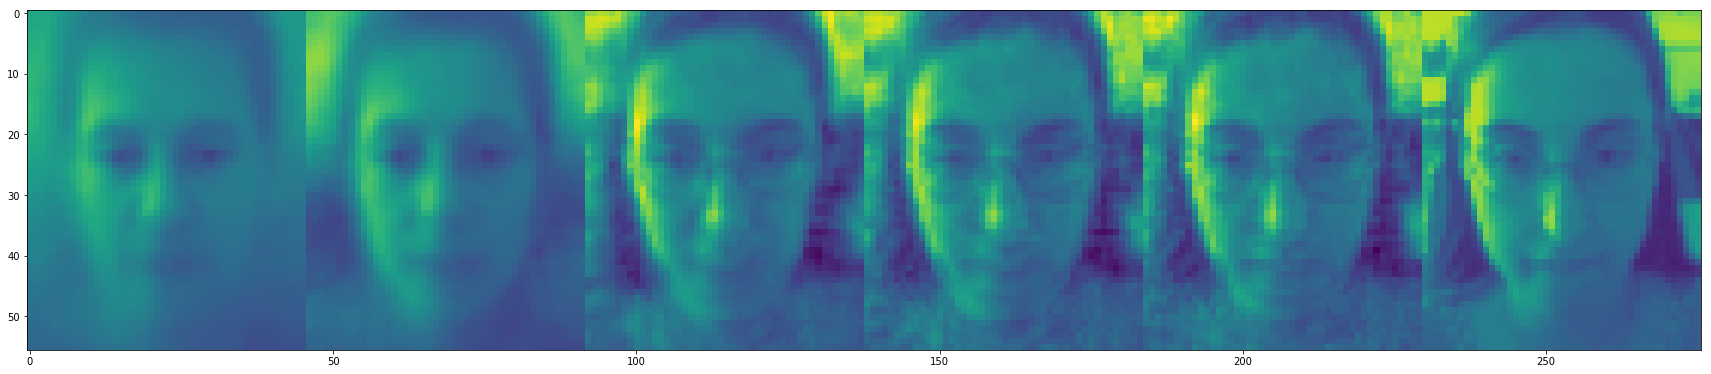

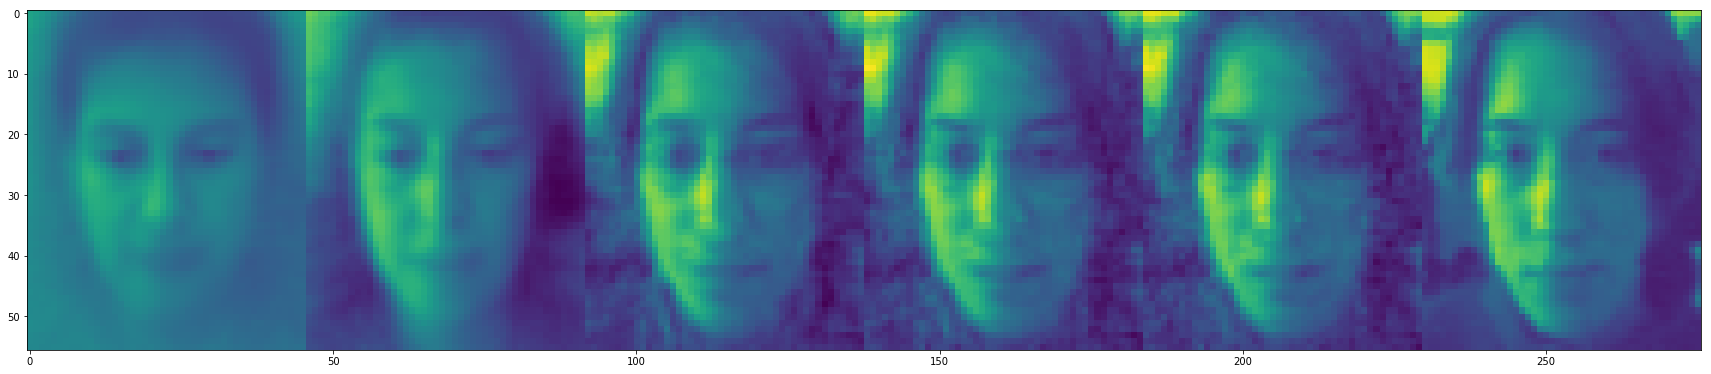

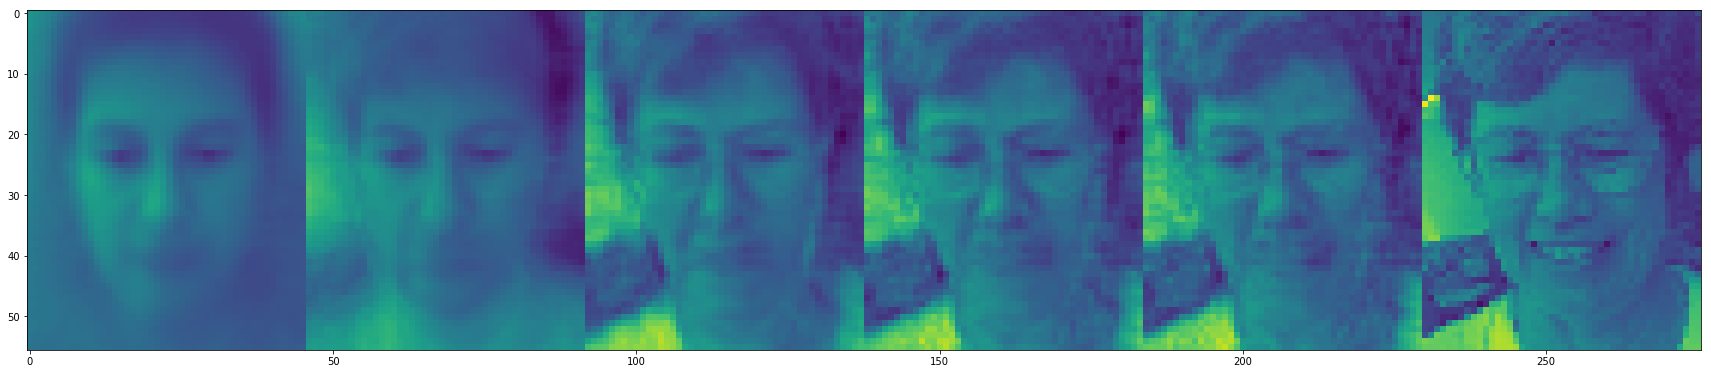

In [96]:
centered_test_face = test_face - mean_face
for face_chosen in [10, 23, 50]:
    pics = []
#     face_chosen = 50
    plt.figure(figsize=(30,10))
    for M in [1, 10, 100, 200, 300]:
        best_evecs = evecs[:,:M]
        a_face_chosen = np.dot(centered_test_face[face_chosen], best_evecs)
        reconstructed = mean_face + np.dot(a_face_chosen, best_evecs.T)
        pics.append(np.rot90(reconstructed.reshape(46, -1), k = -1))

#         print('error for {} evecs: {}'.format(M, np.mean((zscore(test_face[face_chosen]) - zscore(reconstructed)) ** 2)))


    pics.append(np.rot90(test_face[face_chosen].reshape(46, -1), k = -1))

    plt.imshow(np.hstack(pics))
    plt.show()

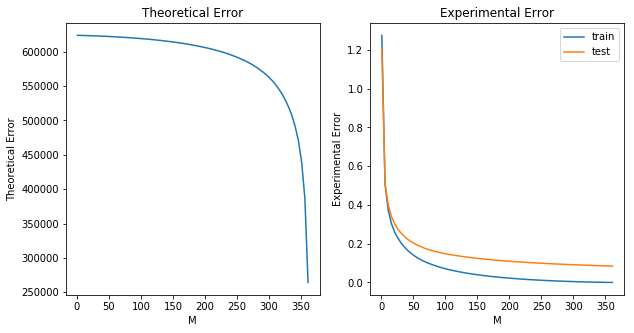

In [97]:
# Theoritical error
theory_errors = [
    np.sum(evals[M:]) 
    for M in range(1,364,5)
]

#theory_errors = (theory_errors-min(theory_errors))/(max(theory_errors)-min(theory_errors))


# Experimental error
def reconstructed_train_faces(M):
    best_evecs = evecs[:,:M]
    a_face_chosen = np.dot(centered_train_face, best_evecs)
    return mean_face + np.dot(a_face_chosen, best_evecs.T)


def reconstructed_test_faces(M):
    best_evecs = evecs[:,:M]
    a_face_chosen = np.dot(centered_test_face, best_evecs)
    return mean_face + np.dot(a_face_chosen, best_evecs.T)

train_exp_errors = [
    ((zscore(centered_train_face, axis=0) - zscore(reconstructed_train_faces(M), axis=0)) ** 2).mean()
    for M in range(1,364,5)
]

#train_exp_errors = (train_exp_errors-min(train_exp_errors))/(max(train_exp_errors)-min(train_exp_errors))


test_exp_errors = [
    ((zscore(centered_test_face, axis=0) - zscore(reconstructed_test_faces(M), axis=0)) ** 2).mean()
    for M in range(1,364,5)
]

#test_exp_errors = (test_exp_errors-min(test_exp_errors))/(max(test_exp_errors)-min(test_exp_errors))

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5))
ax1.plot(range(1,364,5), theory_errors)
ax1.set_title('Theoretical Error')
ax1.set_xlabel('M')
ax1.set_ylabel('Theoretical Error')

ax2.plot(range(1,364,5), train_exp_errors)
ax2.plot(range(1,364,5), test_exp_errors)
ax2.set_title('Experimental Error')
#plt.plot(range(1,1000,10), theory_errors)  
plt.xlabel('M')
plt.ylabel('Experimental Error')
plt.legend(['train', 'test'])
plt.show()

## Application of Eigenfaces

In [98]:
from sklearn import neighbors
from pandas_ml import ConfusionMatrix

optimal m on validation set: 131
accuracy using optimal m: 0.4528301886792453


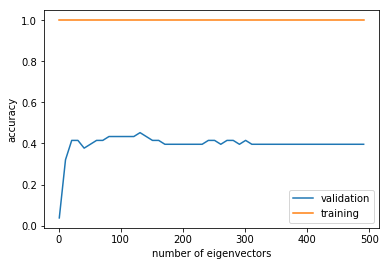

In [99]:
val_face, ftest_face, val_labels, ftest_labels = train_test_split(test_face, test_labels, test_size = 0.66)

train_accuracies = []
val_accuracies = []
n_neighbors = 1
weights = 'distance'
for m in range(1, 500, 10):
    projected_training_set = np.dot(train_face, evecs[:,:m])
    projected_val_set = np.dot(val_face, evecs[:,:m])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(projected_training_set, train_labels)

    predicted_labels = clf.predict(projected_val_set)
    accuracy = np.mean(predicted_labels == val_labels)
    val_accuracies.append(accuracy)
    
    train_accuracies.append(np.mean(clf.predict(projected_training_set) == train_labels))
    
plt.plot(range(1, 500, 10), val_accuracies)
plt.plot(range(1, 500, 10), train_accuracies)
plt.xlabel('number of eigenvectors')
plt.ylabel('accuracy')
plt.legend(['validation', 'training'])

best_m = list(range(1, 500, 10))[np.argmax(val_accuracies)]
print('optimal m on validation set: {}'.format(best_m))
print('accuracy using optimal m: {}'.format(max(val_accuracies)))

In [100]:
print("--- Validating: %s seconds ---" % (time.time() - start_time))

--- Validating: 4570.688063144684 seconds ---


test set accuracy: 0.5064102564102564


/home/theo/miniconda3/envs/PatternRec/lib/python3.6/site-packages/pandas_ml/confusion_matrix/abstract.py:66: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  df = df.loc[idx, idx.copy()].fillna(0)  # if some columns or rows are missing


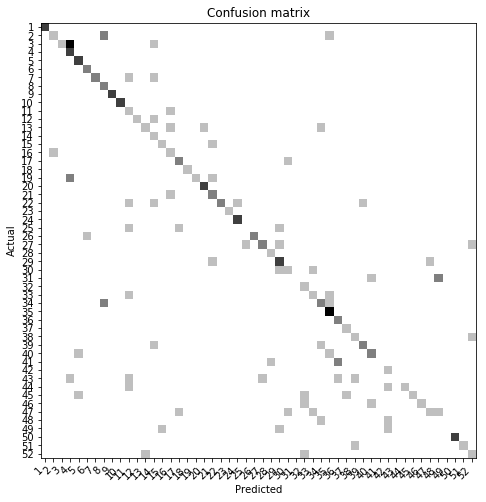

In [101]:
projected_training_set = np.dot(train_face, evecs[:,:best_m])
projected_test_set = np.dot(test_face, evecs[:,:best_m])

clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(projected_training_set, train_labels)

predicted_labels = clf.predict(projected_test_set)
accuracy = np.mean(predicted_labels == test_labels)

print('test set accuracy: {}'.format(accuracy))

confusion_matrix = ConfusionMatrix(test_labels, predicted_labels)
confusion_matrix.plot()

ground truth: [48 48]
predicted labels: [42 34]


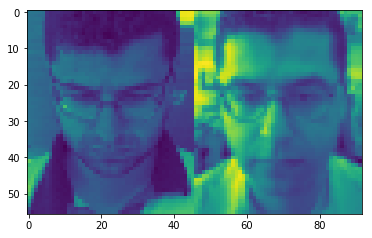

In [102]:
selector = test_labels == 48
selected_test_labels = test_labels[selector]
relevant_predicted_labels = predicted_labels[selector]
relevant_test_faces = test_face[selector]

s1 = np.logical_not(selected_test_labels == relevant_predicted_labels)
wrongs = relevant_test_faces[s1]

plt.imshow(np.hstack(
    [np.rot90(face.reshape(46, -1), k = -1) for face in wrongs]
))

print('ground truth: {}'.format(selected_test_labels[s1]))
print('predicted labels: {}'.format(relevant_predicted_labels[s1]))

In [103]:
selected_test_labels = test_labels[selector]
relevant_predicted_labels = predicted_labels[selector]
relevant_test_faces = test_face[selector]

s1 = np.logical_not(selected_test_labels != relevant_predicted_labels)
wrongs = relevant_test_faces[s1]

plt.imshow(np.hstack(
    [np.rot90(face.reshape(46, -1), k = -1) for face in wrongs]
))

print('ground truth: {}'.format(selected_test_labels[s1]))
print('predicted labels: {}'.format(relevant_predicted_labels[s1]))

ValueError: need at least one array to concatenate

In [ ]:
print("--- Testing: %s seconds ---" % (time.time() - start_time))

In [ ]:
# Vary the training set size:
mean_errors = []
set_size = []
times = []
for P in range(1,11,1):
    errors = []
    start_time = time.time()
    for I in range (10):
        new_train_face, test_face_ignore, new_train_labels, test_labels_ignore = train_test_split(train_face, train_labels, test_size=1-(P/10))
        mean_face = np.mean(new_train_face, axis = 0)
        new_centered_train_face = new_train_face - mean_face

    #     print(new_centered_train_face.shape)

        S =  1 / new_centered_train_face.shape[1] * np.dot(new_centered_train_face, new_centered_train_face.T)


        evals, evecs = np.linalg.eigh(S)
        evecs = np.dot(new_centered_train_face.T,np.flip(evecs, axis = 1))
        evecs = normalize(evecs,axis=0)

        projected_training_set = np.dot(new_train_face, evecs[:,:best_m])
        projected_test_set = np.dot(test_face, evecs[:,:best_m])

        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(projected_training_set, new_train_labels)

        predicted_labels = clf.predict(projected_test_set)
        accuracy = np.mean(predicted_labels == test_labels)

        errors.append(accuracy)
    set_size.append(new_train_face.shape[0])
    mean_errors.append(np.mean(errors))
    times.append(time.time()-start_time)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize = (10,5))   
    
ax1.plot(set_size, mean_errors)
ax1.set_xlabel('Size of training set')
ax1.set_ylabel('Accuracy')
ax1.set_title('Validation accuracies')

ax2.plot(set_size, times)
ax2.set_xlabel('Size of training set')
ax2.set_ylabel('Execution time (s)')
ax2.set_title('Execution Times')
plt.show()